<a href="https://colab.research.google.com/github/LuisaPolicarpo/Berlin-Bike-Sharing/blob/main/Berlin_Bike_Sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# --- Connect to CityBikes API ---
url = "http://api.citybik.es/v2/networks/nextbike-berlin"
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()

    # Extract station data
    stations = data['network']['stations']

    # Create a DataFrame
    df_stations = pd.DataFrame(stations)


**EDA**

In [3]:
df_stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4054 non-null   object 
 1   name         4054 non-null   object 
 2   latitude     4054 non-null   float64
 3   longitude    4054 non-null   float64
 4   timestamp    4054 non-null   object 
 5   free_bikes   4054 non-null   int64  
 6   empty_slots  4053 non-null   float64
 7   extra        4054 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 253.5+ KB


In [4]:
df_stations.describe()

,latitude,longitude,free_bikes,empty_slots
count,4054.000000,4054.000000,4054.000000,4053.000000
mean,52.502821,13.396557,0.753577,3.937084
std,0.035329,0.093232,1.525086,2.481270
min,52.387091,13.124609,0.000000,0.000000
25%,52.481683,13.331349,0.000000,3.000000
50%,52.504886,13.392730,0.000000,4.000000
75%,52.525765,13.452406,1.000000,4.000000
max,52.636179,13.721039,44.000000,33.000000


In [5]:
df_stations.isna().sum()

,0
id,0
name,0
latitude,0
longitude,0
timestamp,0
free_bikes,0
empty_slots,1
extra,0


In [6]:
df_stations['free_bikes'] = df_stations['free_bikes'].fillna(0)
df_stations['empty_slots'] = df_stations['empty_slots'].fillna(0)

In [7]:
df_stations['total_slots'] = df_stations['free_bikes'] + df_stations['empty_slots']
df_stations['occupancy_rate'] = round(df_stations['free_bikes'] / df_stations['total_slots'],2)

In [8]:
df_stations.head()

,id,name,latitude,longitude,timestamp,free_bikes,empty_slots,extra,total_slots,occupancy_rate
0,000c1394c49338dd136955cfa83f0f02,virtuell - U Ullsteinstraße (Staubenrauchbrücke),52.453146,13.384738,2025-04-29T20:00:30.475880+00:00Z,0,6.0,"{'uid': '134099782', 'number': '10209', 'slots...",6.0,0.00
1,000d6738d33fd09713f9ba3d645eb083,virtuell - Olivaer Platz (Nordwest),52.499709,13.313215,2025-04-29T20:00:30.480191+00:00Z,2,2.0,"{'uid': '136246186', 'number': '10445', 'slots...",4.0,0.50
2,00262119a775f009135c009c642de971,Katzbachstraße | BONUS-Station: Return(Rückgab...,52.487904,13.376718,2025-04-29T20:00:30.290754+00:00Z,2,13.0,"{'uid': '3173794', 'number': '1449', 'slots': ...",15.0,0.13
3,0029bd4fba89c502af0c1732591080cd,virtuell - Greifswalder Straße/Lehderstraße,52.547140,13.447640,2025-04-29T20:00:30.508045+00:00Z,0,4.0,"{'uid': '140006670', 'number': '11039', 'slots...",4.0,0.00
4,00455239920d92cdc60461f8b8619fac,virtuell - Linienstraße/Weydingerstraße,52.527005,13.414112,2025-04-29T20:00:30.496330+00:00Z,5,0.0,"{'uid': '138056052', 'number': '10740', 'slots...",5.0,1.00


In [9]:
df_stations.columns

Index(['id', 'name', 'latitude', 'longitude', 'timestamp', 'free_bikes',
       'empty_slots', 'extra', 'total_slots', 'occupancy_rate'],
      dtype='object')

In [10]:
df_stations = df_stations.drop(columns=['id', 'extra'])

In [11]:
df_stations

,name,latitude,longitude,timestamp,free_bikes,empty_slots,total_slots,occupancy_rate
0,virtuell - U Ullsteinstraße (Staubenrauchbrücke),52.453146,13.384738,2025-04-29T20:00:30.475880+00:00Z,0,6.0,6.0,0.00
1,virtuell - Olivaer Platz (Nordwest),52.499709,13.313215,2025-04-29T20:00:30.480191+00:00Z,2,2.0,4.0,0.50
2,Katzbachstraße | BONUS-Station: Return(Rückgab...,52.487904,13.376718,2025-04-29T20:00:30.290754+00:00Z,2,13.0,15.0,0.13
3,virtuell - Greifswalder Straße/Lehderstraße,52.547140,13.447640,2025-04-29T20:00:30.508045+00:00Z,0,4.0,4.0,0.00
4,virtuell - Linienstraße/Weydingerstraße,52.527005,13.414112,2025-04-29T20:00:30.496330+00:00Z,5,0.0,5.0,1.00
...,...,...,...,...,...,...,...,...
4049,virtuell - Schellingstraße (Reichpietschufer),52.505303,13.372947,2025-04-29T20:00:30.435250+00:00Z,1,3.0,4.0,0.25
4050,virtuell - Gerichtstraße/Adolfstraße,52.544916,13.367097,2025-04-29T20:00:30.553962+00:00Z,0,4.0,4.0,0.00
4051,virtuell - Zehlendorf Eiche (Clayallee),52.434834,13.260059,2025-04-29T20:00:30.684707+00:00Z,0,4.0,4.0,0.00
4052,virtuell - Schwedter Straße/Choriner Straße,52.534172,13.408529,2025-04-29T20:00:30.576646+00:00Z,1,3.0,4.0,0.25


<ipython-input-13-21dd3f40d881>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_avg.head(15), x='occupancy_rate', y='name', palette='Reds_r')
<ipython-input-13-21dd3f40d881>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=station_avg.tail(15), x='occupancy_rate', y='name', palette='Blues')
<ipython-input-13-21dd3f40d881>:17: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-13-21dd3f40d881>:17: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128308 (\N{LAR

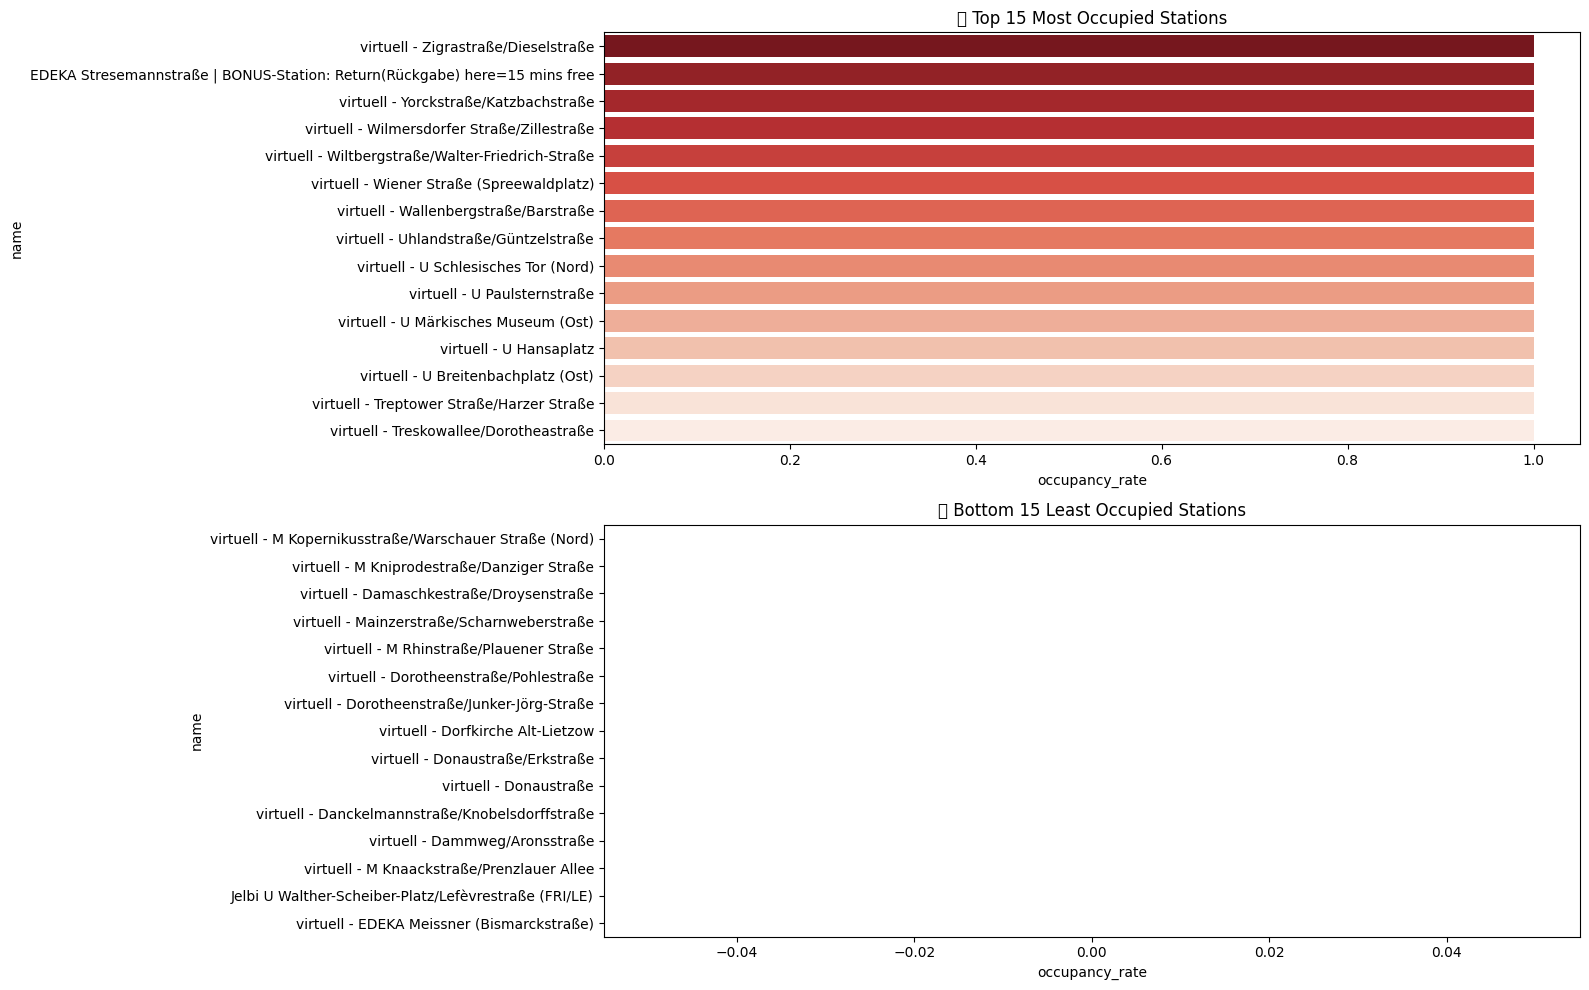

In [13]:
# Group by station name and compute average occupancy
station_avg = df_stations.groupby('name')['occupancy_rate'].mean().sort_values(ascending=False).reset_index()

# Plot top 15 and bottom 15 stations
plt.figure(figsize=(16, 10))

# Top 15 most occupied
plt.subplot(2, 1, 1)
sns.barplot(data=station_avg.head(15), x='occupancy_rate', y='name', palette='Reds_r')
plt.title('🔴 Top 15 Most Occupied Stations')

# Bottom 15 least occupied
plt.subplot(2, 1, 2)
sns.barplot(data=station_avg.tail(15), x='occupancy_rate', y='name', palette='Blues')
plt.title('🔵 Bottom 15 Least Occupied Stations')

plt.tight_layout()
plt.show()